<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Visualizing-agent-trajectory" data-toc-modified-id="Visualizing-agent-trajectory-1">Visualizing agent trajectory</a></span><ul class="toc-item"><li><span><a href="#Imports" data-toc-modified-id="Imports-1.1">Imports</a></span></li><li><span><a href="#Visualization" data-toc-modified-id="Visualization-1.2">Visualization</a></span></li><li><span><a href="#Initial-visualizations" data-toc-modified-id="Initial-visualizations-1.3">Initial visualizations</a></span></li><li><span><a href="#More-precise-tests" data-toc-modified-id="More-precise-tests-1.4">More precise tests</a></span></li></ul></li></ul></div>

# Visualizing agent trajectory

## Imports

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline

In [268]:
plt.plot()
plt.close('all')
plt.rcParams["figure.figsize"] = (18, 6)  
mpl.rcParams['lines.linewidth'] = 3
mpl.rcParams['font.size'] = 16

## Visualization

https://github.com/beyretb/AnimalAI-Olympics/issues/77

> It is the z (forward) component of the agent's velocity in its local reference frame.

z seems to be the forward direction of the agent, x lateral and y is related to height.

So I have to take orientation of the agent into account to be able to map the agent position. A complete rotation takes 60 steps, and it does not seem to use inertia. So each time the agent rotates it does 6º turn.

In [269]:
def visualize_gameplay(filepath):
    data = np.load(filepath)
    #_plot_speed_profile(data); plt.figure()
    positions, rotations = _track_agent_position(data)
    positions = _normalize_position(positions)
    plt.subplot(131)
    plt.scatter(positions[:, 0], positions[:, 1], c=np.linspace(0, 1, len(positions)))
    #plt.xlim(-5, 60)
    #plt.ylim(-5, 60)
    plt.subplot(132)
    plt.plot(rotations)
    plt.subplot(133)
    plt.plot(positions[:, 0])
    plt.plot(positions[:, 1])
    
def _plot_speed_profile(data):
    plt.figure()
    plt.plot(data['speed'][:, 0, 0], label='x')
    plt.plot(data['speed'][:, 0, 1], label='y')
    plt.plot(data['speed'][:, 0, 2], label='z')
    plt.title('Speed profiles')
    plt.legend(loc=0)
    
def _track_agent_position(data):
    orientation = 0
    orientations = [orientation]
    position = np.zeros(2)
    positions = [position.copy()]
    speeds = data['speed'][:, 0, [0, 2]]/10/1.625
    rotations = data['previous_action'][:, 0, 1]
    #rotations = data['action'][:, 1]
    for speed, rotation in zip(speeds, rotations):
        if rotation == 1:
            orientation += 6
        elif rotation == 2:
            orientation -= 6
        alpha = -1
        position[1] += np.sum(speed*np.array([alpha*np.sin(orientation*np.pi/180), np.cos(orientation*np.pi/180)]))
        position[0] -= np.sum(speed*np.array([alpha*np.cos(orientation*np.pi/180), -np.sin(orientation*np.pi/180)]))
        positions.append(position.copy())
        orientations.append(orientation)
    return np.array(positions), np.array(orientations)

def _normalize_position(positions):
    positions -= np.min(positions, axis=0)
    return positions

## Initial visualizations

[27.75200682 19.24296368]


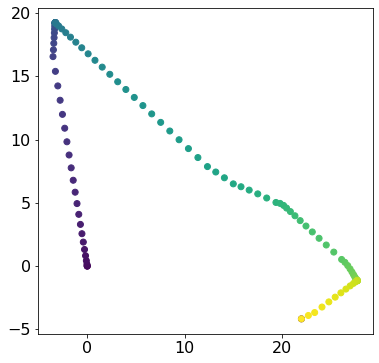

In [4]:
visualize_gameplay('/media/guillermo/Data/Kaggle/animalai/gameplay/4multi/00000.npz')

[23.37371529  7.69415385]


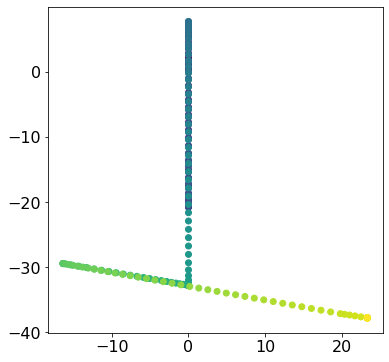

In [5]:
visualize_gameplay('/media/guillermo/Data/Kaggle/animalai/gameplay/4multi/00001.npz')

[10.35710709 17.13547333]


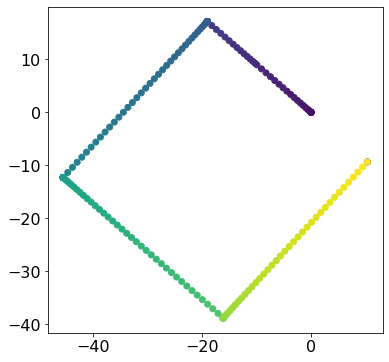

In [6]:
visualize_gameplay('/media/guillermo/Data/Kaggle/animalai/gameplay/4multi/00002.npz') # this should be a square

[43.97015002 22.81682009]


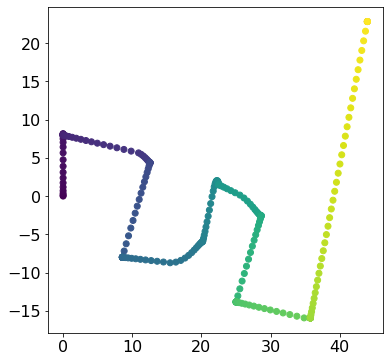

In [7]:
visualize_gameplay('/media/guillermo/Data/Kaggle/animalai/gameplay/4multi/00003.npz') # zig zag and move to the other side

It's not perfect but it's a good beginning. I have to think how to do more precise experiments and how to test that it works correctly.

## More precise tests

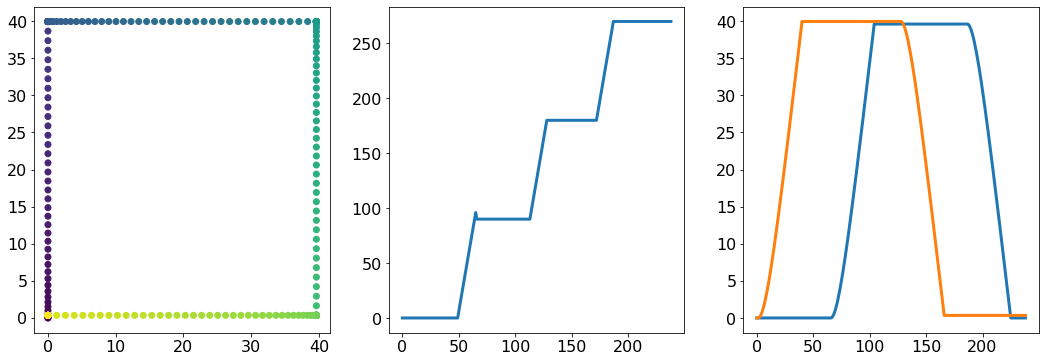

In [270]:
visualize_gameplay('/media/guillermo/Data/Kaggle/animalai/gameplay/map/00000.npz') # square

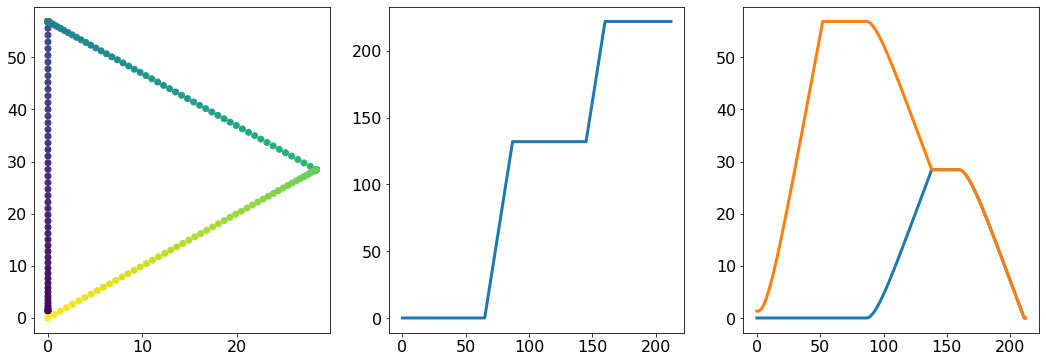

In [271]:
visualize_gameplay('/media/guillermo/Data/Kaggle/animalai/gameplay/map/00001.npz') # triangle starting at rotation 45

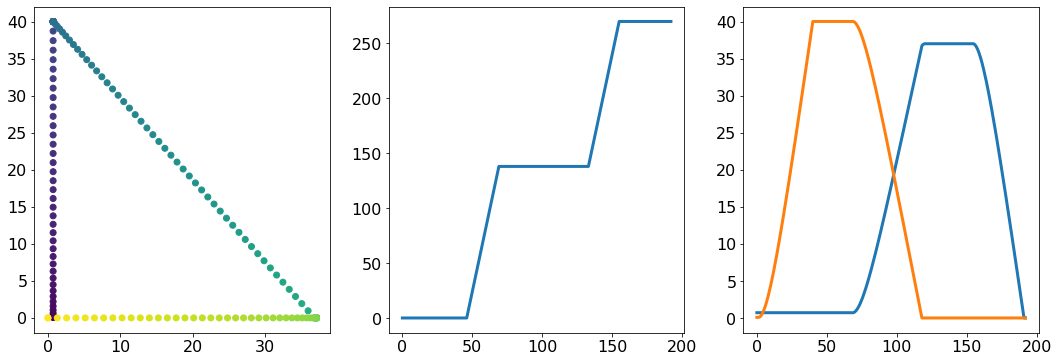

In [272]:
visualize_gameplay('/media/guillermo/Data/Kaggle/animalai/gameplay/map/00002.npz') # triangle starting at rotation 0

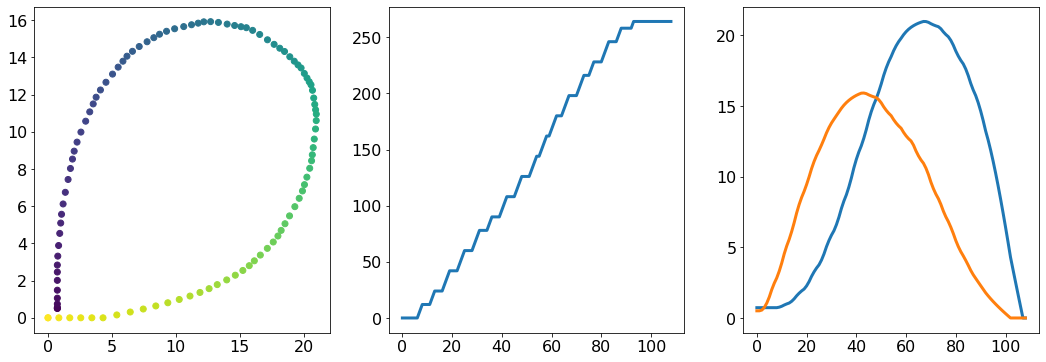

In [273]:
visualize_gameplay('/media/guillermo/Data/Kaggle/animalai/gameplay/map/00003.npz') # go around the arena and back to the initial point

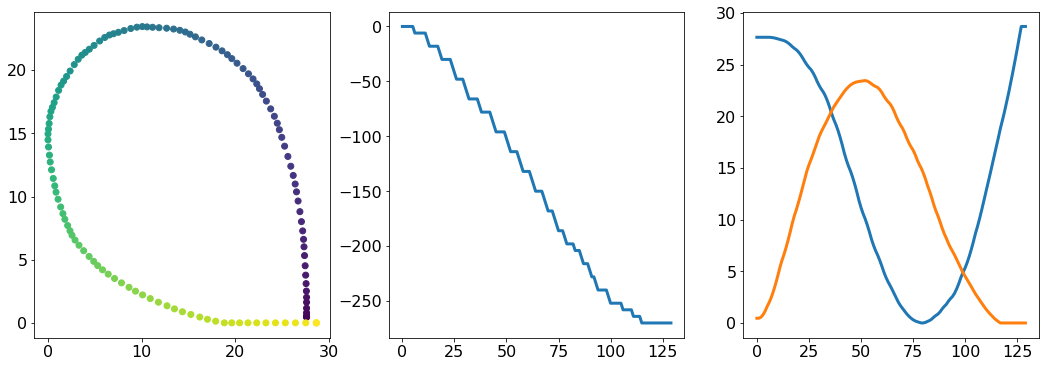

In [274]:
visualize_gameplay('/media/guillermo/Data/Kaggle/animalai/gameplay/map/00004.npz') # go around the arena and back to the initial point going in other direction

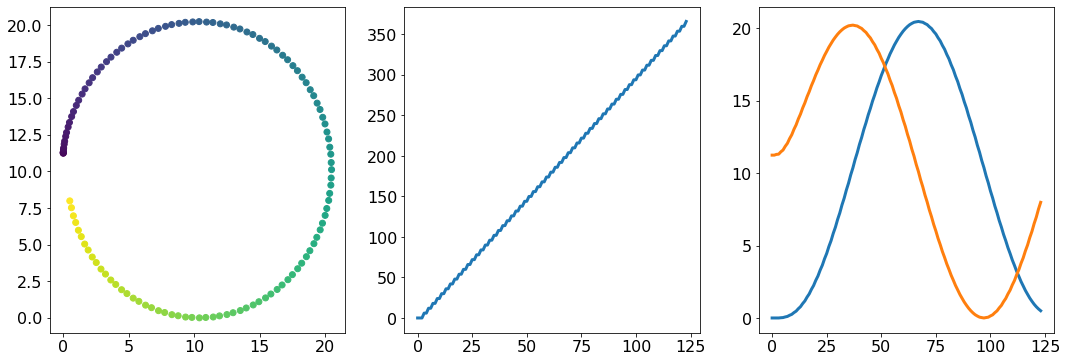

In [275]:
visualize_gameplay('/media/guillermo/Data/Kaggle/animalai/gameplay/map/00005.npz') # circle

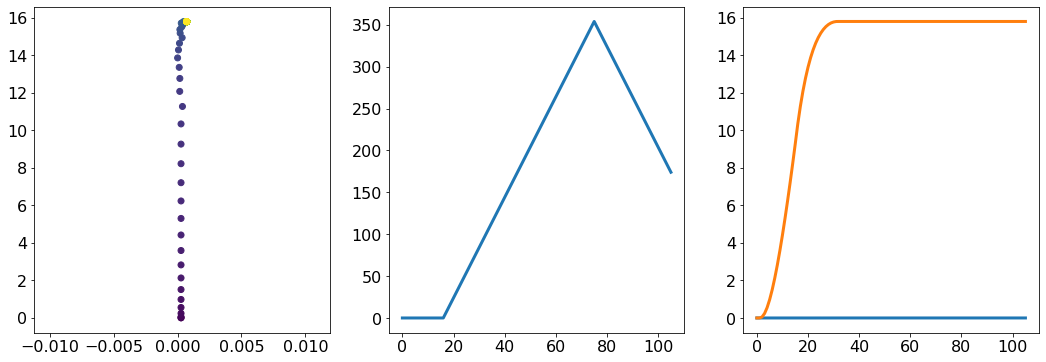

In [276]:
visualize_gameplay('/media/guillermo/Data/Kaggle/animalai/gameplay/map/00006.npz') # straight line, i rotate but without moving from the trajectory

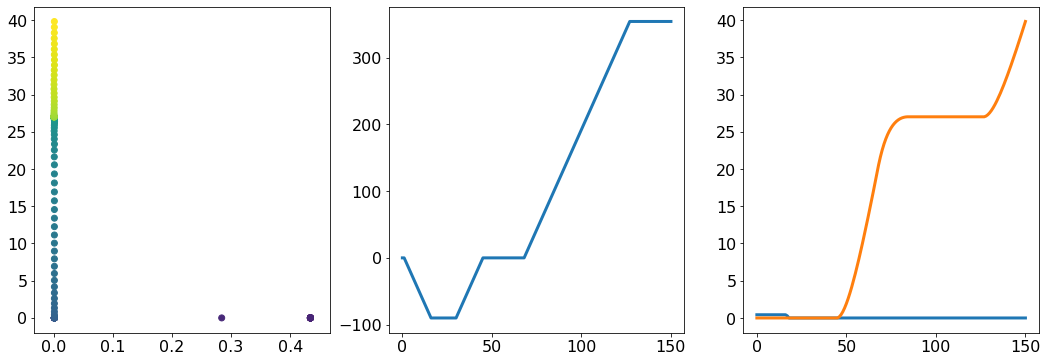

In [277]:
visualize_gameplay('/media/guillermo/Data/Kaggle/animalai/gameplay/map/00007.npz') # straight line, i rotate but without moving from the trajectory

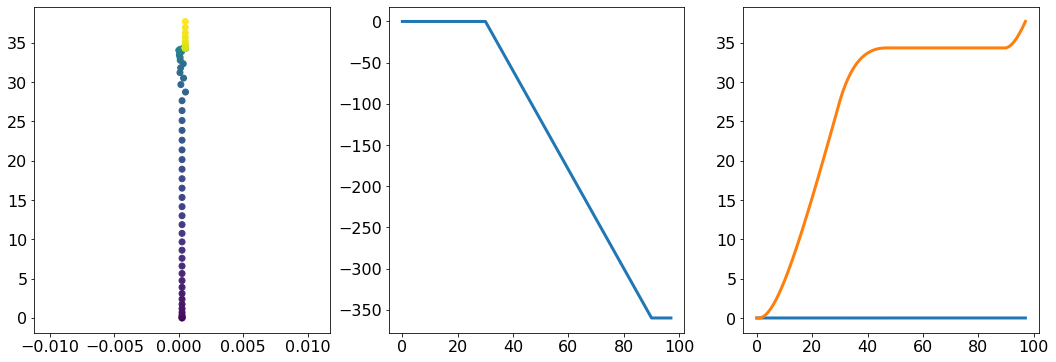

In [278]:
visualize_gameplay('/media/guillermo/Data/Kaggle/animalai/gameplay/map/00008.npz') # straight line, i rotate but without moving from the trajectory

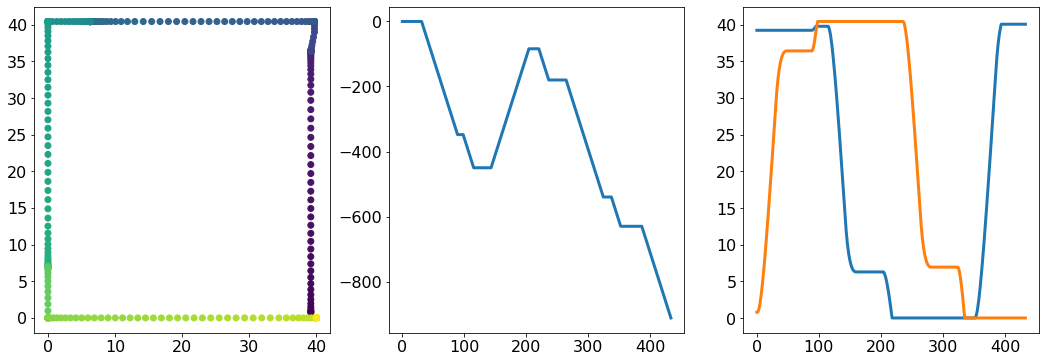

In [279]:
visualize_gameplay('/media/guillermo/Data/Kaggle/animalai/gameplay/map/00009.npz') # square, but doing rotations on each side

I want to visualize also rotation.

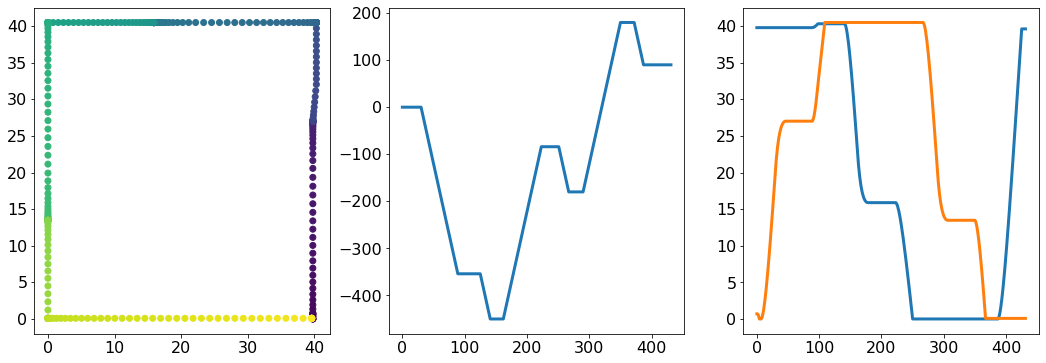

In [280]:
visualize_gameplay('/media/guillermo/Data/Kaggle/animalai/gameplay/map/00010.npz') # square, but doing rotations on each side

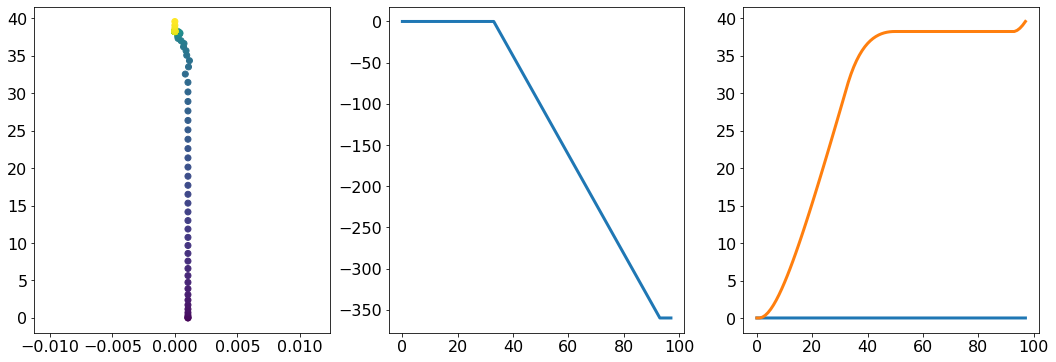

In [281]:
visualize_gameplay('/media/guillermo/Data/Kaggle/animalai/gameplay/map/00011.npz') # straight line with rotation att the end

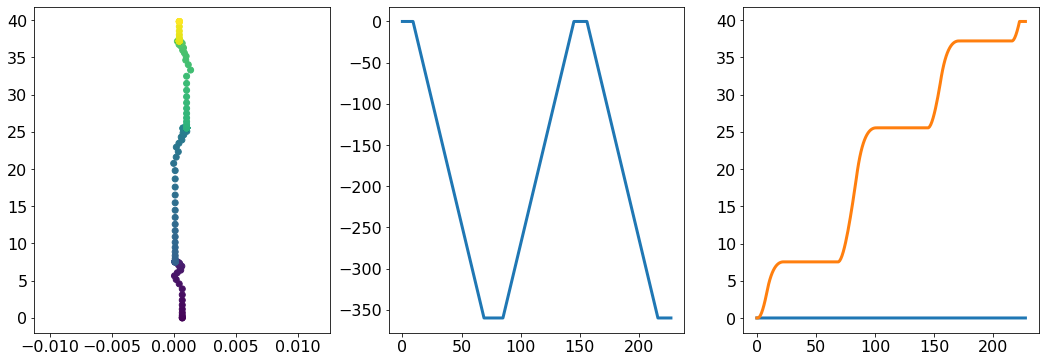

In [282]:
visualize_gameplay('/media/guillermo/Data/Kaggle/animalai/gameplay/map/00012.npz') # straight line with three rotations

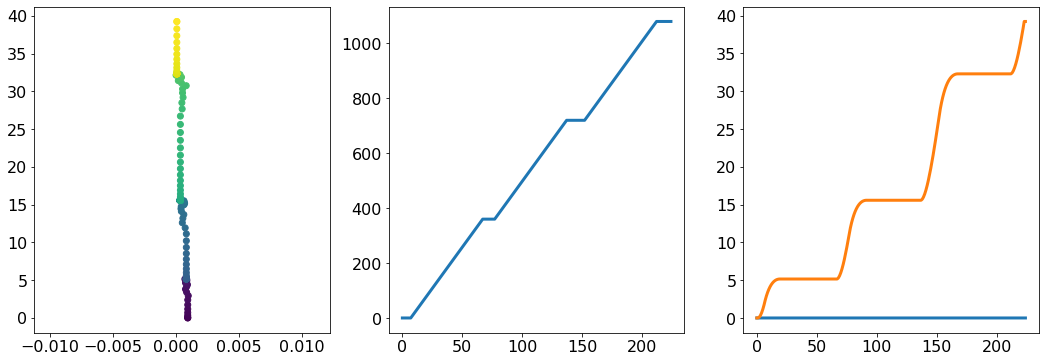

In [283]:
visualize_gameplay('/media/guillermo/Data/Kaggle/animalai/gameplay/map/00013.npz') # straight line with three rotations clockwise

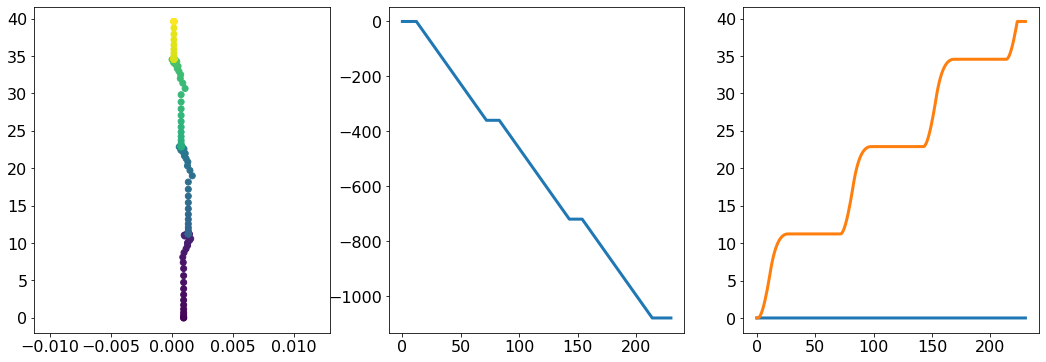

In [284]:
visualize_gameplay('/media/guillermo/Data/Kaggle/animalai/gameplay/map/00014.npz') # straight line with three rotations anti-clockwise

It seems that the more the rotations the less distance is travelled, so there has to be something wrong about it. The line is straight but the distance is not correct.